Codigo inicial de exploracion del dataset

In [2]:
import pandas as pd

data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4746 non-null   int64  
 1   C_api          4746 non-null   object 
 2   C_man          4746 non-null   int64  
 3   E_NEds         4746 non-null   int64  
 4   E_Bpag         4746 non-null   int64  
 5   firstDay       4746 non-null   int64  
 6   lastDay        4746 non-null   int64  
 7   NEds           4746 non-null   int64  
 8   NDays          4746 non-null   int64  
 9   NActDays       4746 non-null   int64  
 10  NPages         4746 non-null   int64  
 11  NPcreated      4746 non-null   int64  
 12  pagesWomen     4746 non-null   int64  
 13  wikiprojWomen  4746 non-null   int64  
 14  ns_user        4746 non-null   int64  
 15  ns_wikipedia   4746 non-null   int64  
 16  ns_talk        4746 non-null   int64  
 17  ns_userTalk    4746 non-null   int64  
 18  ns_conte

In [3]:
data.head()

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994


### Variables del Estudio

- **gender**: Género del editor.
  - 0: Desconocido
  - 1: Masculino
  - 2: Femenino

- **C_api**: Género extraído de la API de WikiMedia, codificado como femenino / masculino / desconocido.

- **C_man**: Género extraído de la codificación de contenido, codificado como:
  - 1: Masculino
  - 2: Femenino
  - 3: Desconocido

- **E_NEds**: Índice I del estrato IJ (0,1,2,3). Indica un grupo específico de editores basado en la actividad de edición.

- **E_Bpag**: Índice J del estrato IJ (0,1,2,3). Indica un grupo específico de editores basado en el tamaño de su página personal.

- **firstDay**: Primer día de edición en la Wikipedia en español (formato YYYYMMDDHHMMSS).

- **lastDay**: Último día de edición en la Wikipedia en español (formato YYYYMMDDHHMMSS).

- **NEds**: Número total de ediciones realizadas.

- **NDays**: Número de días entre la primera y última edición (lastDay - firstDay + 1).

- **NActDays**: Número de días en los que se realizaron ediciones.

- **NPages**: Número de páginas diferentes editadas.

- **NPcreated**: Número de páginas creadas.

- **pagesWomen**: Número de ediciones en páginas relacionadas con temas de mujeres.

- **wikiprojWomen**: Número de ediciones en WikiProjects relacionados con temas de mujeres.

- **ns_user**: Número de ediciones en el espacio de nombres "usuario".

- **ns_wikipedia**: Número de ediciones en el espacio de nombres "wikipedia".

- **ns_talk**: Número de ediciones en el espacio de nombres "discusión".

- **ns_userTalk**: Número de ediciones en el espacio de nombres "discusión de usuario".

- **ns_content**: Número de ediciones en páginas de contenido.

- **weightIJ**: Peso corrector para el estrato IJ, utilizado para ajustar la representación en el análisis.

- **NIJ**: Número de elementos en el estrato IJ, indicando el tamaño del grupo de editores en ese estrato.


codigo para graficos de Barras Stack proporcional

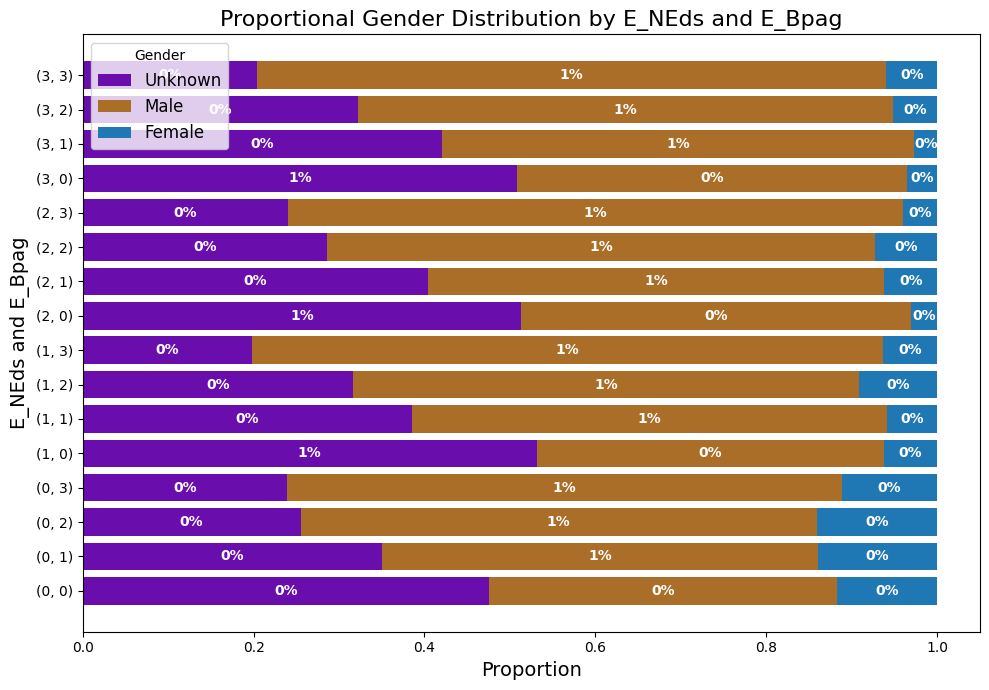

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = pd.read_csv('data.csv')
colors = ['#6a0dad', '#aa6e28', '#1f77b4']
pivot_table = data.pivot_table(index=['E_NEds', 'E_Bpag'], columns='gender', aggfunc='size', fill_value=0)

proportional_data = pivot_table.div(pivot_table.sum(axis=1), axis=0)

proportional_data.index = proportional_data.index.map(lambda x: f"({x[0]}, {x[1]})")

fig, ax = plt.subplots(figsize=(10, 7))
bottom = pd.Series([0] * len(proportional_data), index=proportional_data.index)

for gender, color in zip(proportional_data.columns, colors):
    bars = ax.barh(proportional_data.index, proportional_data[gender], left=bottom, color=color, label=gender)
    bottom += proportional_data[gender]

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f%%', label_type='center', color='white', weight='bold')

ax.set_title('Proportional Gender Distribution by E_NEds and E_Bpag', fontsize=16)
ax.set_xlabel('Proportion', fontsize=14)
ax.set_ylabel('E_NEds and E_Bpag', fontsize=14)
ax.legend(title='Gender', labels=['Unknown', 'Male', 'Female'], loc='best', fontsize=12)

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('data.csv')

gender_mapping = {
    0: "desconocido",
    1: "masculino",
    2: "femenino"
}
data['gender'] = data['gender'].map(gender_mapping)

# Definir las categorías descriptivas
category_mapping_E_NEds = {
    0: "Muy baja (50-93 ediciones)",
    1: "Baja (94-222 ediciones)",
    2: "Media (223-848 ediciones)",
    3: "Alta (849 o más ediciones)"
}

category_mapping_E_Bpag = {
    0: "Muy baja (1-186 bytes)",
    1: "Baja (187-705 bytes)",
    2: "Media (706-2148 bytes)",
    3: "Alta (2149 o más bytes)"
}

pivot_table_E_NEds = data.pivot_table(index='E_NEds', columns='gender', aggfunc='size', fill_value=0)
proportional_data_E_NEds = pivot_table_E_NEds.div(pivot_table_E_NEds.sum(axis=1), axis=0)

pivot_table_E_NEds.index = pivot_table_E_NEds.index.map(category_mapping_E_NEds)
proportional_data_E_NEds.index = proportional_data_E_NEds.index.map(category_mapping_E_NEds)

combined_data_E_NEds = proportional_data_E_NEds.copy()
combined_data_E_NEds['Desconocido_cantidad'] = pivot_table_E_NEds['desconocido']
combined_data_E_NEds['Masculino_cantidad'] = pivot_table_E_NEds['masculino']
combined_data_E_NEds['Femenino_cantidad'] = pivot_table_E_NEds['femenino']

output_file_E_NEds = 'scatter_E_NEds.csv'
combined_data_E_NEds.to_csv(output_file_E_NEds, index=True)

pivot_table_E_Bpag = data.pivot_table(index='E_Bpag', columns='gender', aggfunc='size', fill_value=0)
proportional_data_E_Bpag = pivot_table_E_Bpag.div(pivot_table_E_Bpag.sum(axis=1), axis=0)

pivot_table_E_Bpag.index = pivot_table_E_Bpag.index.map(category_mapping_E_Bpag)
proportional_data_E_Bpag.index = proportional_data_E_Bpag.index.map(category_mapping_E_Bpag)

combined_data_E_Bpag = proportional_data_E_Bpag.copy()
combined_data_E_Bpag['Desconocido_cantidad'] = pivot_table_E_Bpag['desconocido']
combined_data_E_Bpag['Masculino_cantidad'] = pivot_table_E_Bpag['masculino']
combined_data_E_Bpag['Femenino_cantidad'] = pivot_table_E_Bpag['femenino']

output_file_E_Bpag = 'scatter_E_Bpag.csv'
combined_data_E_Bpag.to_csv(output_file_E_Bpag, index=True)




Código para Preparación de Datos (diagrama Aluvial)

In [6]:
import pandas as pd

data = pd.read_csv('data.csv')

steps_updated = {
    'User Namespace Edits': 1,
    'Wikipedia Namespace Edits': 1,
    'Talk Namespace Edits': 1,
    'User Talk Namespace Edits': 1,
    'Content Namespace Edits': 1,
    'Unknown': 2,
    'Male': 2,
    'Female': 2,
    'Edits in Pages related to Women': 3,
    'Edits in WikiProjects related to Women': 3,
}

labels = [
    'User Namespace Edits', 'Wikipedia Namespace Edits', 'Talk Namespace Edits', 'User Talk Namespace Edits', 'Content Namespace Edits',
    'Unknown', 'Male', 'Female',
    'Edits in Pages related to Women', 'Edits in WikiProjects related to Women'
]

label_indices = {label: idx for idx, label in enumerate(labels)}

source_updated = []
target_updated = []
value_updated = []
step_from_updated = []
step_to_updated = []

for _, row in data.iterrows():
    for ns_col, ns_label in zip(['ns_user', 'ns_wikipedia', 'ns_talk', 'ns_userTalk', 'ns_content'], 
                                ['User Namespace Edits', 'Wikipedia Namespace Edits', 'Talk Namespace Edits', 'User Talk Namespace Edits', 'Content Namespace Edits']):
        if row[ns_col] > 0:  # Include only non-zero values
            source_updated.append(label_indices[ns_label])
            gender_label = 'Unknown' if row['gender'] == 0 else 'Male' if row['gender'] == 1 else 'Female'
            target_updated.append(label_indices[gender_label])
            value_updated.append(row[ns_col])
            step_from_updated.append(steps_updated[ns_label])
            step_to_updated.append(steps_updated[gender_label])
    
    gender_label = 'Unknown' if row['gender'] == 0 else 'Male' if row['gender'] == 1 else 'Female'
    if row['pagesWomen'] > 0:  # Include only non-zero values
        source_updated.append(label_indices[gender_label])
        target_updated.append(label_indices['Edits in Pages related to Women'])
        value_updated.append(row['pagesWomen'])
        step_from_updated.append(steps_updated[gender_label])
        step_to_updated.append(steps_updated['Edits in Pages related to Women'])
    
    if row['wikiprojWomen'] > 0:  # Include only non-zero values
        source_updated.append(label_indices[gender_label])
        target_updated.append(label_indices['Edits in WikiProjects related to Women'])
        value_updated.append(row['wikiprojWomen'])
        step_from_updated.append(steps_updated[gender_label])
        step_to_updated.append(steps_updated['Edits in WikiProjects related to Women'])

sankey_df_updated = pd.DataFrame({
    'source': source_updated,
    'target': target_updated,
    'value': value_updated,
    'source_label': [labels[s] for s in source_updated],
    'target_label': [labels[t] for t in target_updated],
    'step_from': step_from_updated,
    'step_to': step_to_updated
})

output_file_path_updated = 'Corrected.csv'
sankey_df_updated.to_csv(output_file_path_updated, index=False)



In [7]:
sankey_df_updated = pd.read_csv('Corrected.csv')

descriptions = {
    'User Namespace Edits': 'Este espacio de nombres contiene las páginas de usuario y subpáginas de cada editor de Wikipedia. Las ediciones en este espacio incluyen la personalización de la página de usuario, la creación de subpáginas personales y la actualización de información sobre el editor.',
    'Wikipedia Namespace Edits': 'Este espacio de nombres contiene páginas de políticas, guías, ensayos y otros documentos que rigen el funcionamiento de Wikipedia. Las ediciones aquí incluyen cambios a las políticas de Wikipedia, guías de edición, documentación de procesos y otros contenidos administrativos.',
    'Talk Namespace Edits': 'Este espacio de nombres contiene las páginas de discusión asociadas a los artículos de Wikipedia. Las ediciones en este espacio incluyen la discusión sobre cambios en los artículos, propuestas de mejora, debates sobre contenido y coordinación de esfuerzos editoriales.',
    'User Talk Namespace Edits': 'Este espacio de nombres contiene las páginas de discusión de los usuarios, donde los editores pueden comunicarse entre sí. Las ediciones aquí incluyen mensajes entre usuarios, discusiones sobre ediciones realizadas, resoluciones de conflictos y colaboración en proyectos editoriales.',
    'Content Namespace Edits': 'Este espacio de nombres es el más amplio y contiene los artículos principales de Wikipedia. Las ediciones en este espacio incluyen la creación de nuevos artículos, la actualización y mejora de artículos existentes, la corrección de errores, la adición de fuentes y referencias, y la expansión de información.',
    'Pages Edited': 'Número de páginas diferentes editadas.',
    'Pages Created': 'Número de páginas creadas.',
    'Edits in Pages related to Women': 'Estas son ediciones realizadas en artículos de Wikipedia que están directamente relacionados con mujeres. Esto puede incluir biografías de mujeres, temas de género, y organizaciones de mujeres.',
    'Edits in WikiProjects related to Women': 'Los WikiProjects son iniciativas colaborativas dentro de Wikipedia que agrupan a editores interesados en mejorar artículos sobre temas específicos. Los WikiProjects relacionados con mujeres incluyen WikiProject Women, WikiProject Feminism, WikiProject Women in Science, y WikiProject Women in Red.'
}

sankey_df_updated['description'] = sankey_df_updated.apply(
    lambda row: descriptions.get(row['source_label'], descriptions.get(row['target_label'], '')), axis=1
)

output_file_path_with_descriptions = 'aluvial_descripciones.csv'
sankey_df_updated.to_csv(output_file_path_with_descriptions, index=False)